In [ ]:
# https://data.opendatasoft.com/explore/dataset/georef-australia-state%40public/export/?disjunctive.ste_code&disjunctive.ste_name
# credits OpenDataSoft

In [194]:
import os
import json
from random import sample

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import cnames

In [259]:
hordeum_australia = pd.read_csv(r"./data/hordeum-2025-05-07/hordeum-2025-05-07.csv", low_memory=False)
# australia = pd.read_csv(r"./data/georef-australia-state@public.csv", low_memory=False, sep=';')

In [49]:
os.listdir(r"./data/hordeum-2025-05-07/")

['citation.csv',
 'doi.txt',
 'headings.csv',
 'hordeum-2025-05-07.csv',
 'README.html']

In [50]:
with pd.option_context("display.max_rows", None):
    # print(pd.read_csv(r"./data/hordeum-2025-05-07/headings.csv").loc[:, ["Column name", "Field description"]])
    pass

In [51]:
# life stage
# Family  
# Genus  
# Subgenus  
# Specific Epithet
# Latitude  
# Longitude  
# Datum

In [52]:
hordeum_australia.columns[hordeum_australia.columns.str.contains("itude")]

Index(['decimalLatitude', 'decimalLongitude', 'verbatimLatitude',
       'verbatimLongitude'],
      dtype='object')

In [255]:
# we don't want these
hordeum_australia.query("decimalLatitude>-10")

,dataResourceUid,images,dcterms:modified,dcterms:language,dcterms:license,rightsHolder,dcterms:accessRights,dcterms:bibliographicCitation,references,institutionID,...,source,measurementID,measurementType,measurementUnit,measurementDeterminedBy,measurementAccuracy,degreeOfEstablishment,relatedResourceID,images.1,dcterms:type
2119,dr26650,NaN,2017-05-16,en,CC-BY 4.0 (Int),NaN,NaN,NaN,http://www.aucklandmuseum.com/discover/collect...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhysicalObject
2120,dr26650,NaN,2017-09-07,en,CC-BY 4.0 (Int),NaN,NaN,NaN,http://www.aucklandmuseum.com/discover/collect...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhysicalObject


In [253]:
hordeum_tidied =  hordeum_australia.loc[:, ["country", "stateProvince", "day", "month", "year",
                         "genus", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                                query("decimalLatitude<-10 & specificEpithet!=\"sp.\"")

In [273]:
hordeum_tidied

,country,stateProvince,day,month,year,genus,specificEpithet,decimalLatitude,decimalLongitude
0,Australia,South Australia,16.0,12.0,1976.0,Hordeum,marinum,-35.050000,139.116667
1,Australia,Victoria,20.0,9.0,1978.0,Hordeum,glaucum,-35.850000,145.433333
2,Australia,Tasmania,NaN,6.0,1928.0,Hordeum,aegiceras,-42.883333,147.316667
3,Australia,Tasmania,1.0,12.0,1986.0,Hordeum,glaucum,-40.333333,148.066667
4,Australia,Tasmania,30.0,11.0,1986.0,Hordeum,glaucum,-40.316667,147.883333
...,...,...,...,...,...,...,...,...,...
2666,Australia,Victoria,1.0,11.0,2008.0,Hordeum,distichon,-37.316670,143.783330
2667,Australia,Victoria,22.0,11.0,1979.0,Hordeum,murinum,-36.933300,143.333300
2668,Australia,New South Wales,8.0,9.0,1931.0,Hordeum,glaucum,-33.216700,148.116700
2669,Australia,Victoria,1.0,9.0,2009.0,Hordeum,marinum,-36.495278,145.087500


In [260]:
# australia.loc[:, "Iso 3166-2 Feature Code"]

In [228]:
with open(r"./data/georef-australia-state@public.json", mode='r') as fp:
    ausgeo = json.load(fp=fp)

In [229]:
[(_.get("ste_iso3166_code", None), _.get("ste_name", None)) for _ in ausgeo]

[(None, ['Other Territories']),
 ('WA', ['Western Australia']),
 ('NT', ['Northern Territory']),
 ('VIC', ['Victoria']),
 ('NSW', ['New South Wales']),
 ('SA', ['South Australia']),
 ('ACT', ['Australian Capital Territory']),
 ('TAS', ['Tasmania']),
 ('QLD', ['Queensland'])]

In [264]:
ausgeo[4].get("ste_iso3166_code") #.get("geo_shape", "Oops!").get("geometry", "Welp!").keys()

'NSW'

In [258]:
hordeum_australia.stateProvince.isna().sum()

np.int64(11)

In [261]:
hordeum_colour_lookup = {
    "marinum": "blue",
     "glaucum": "red",
     "aegiceras": "green",
     "hystrix": "orange",
     "murinum": "violet",
     "leporinum": "brown",
     "distichon": "darkcyan",
     "vulgare": "yellow",
     "jubatum": "lightseagreen",
     "bulbosum": "cornflowerblue",
     "pusillum": "grey",
     "stenostachys": "crimson",
     "secalinum": "papayawhip",
     "nodosum": "mediumaquamarine",
     "chilense": "plum",
     "geniculatum": "purple"
}

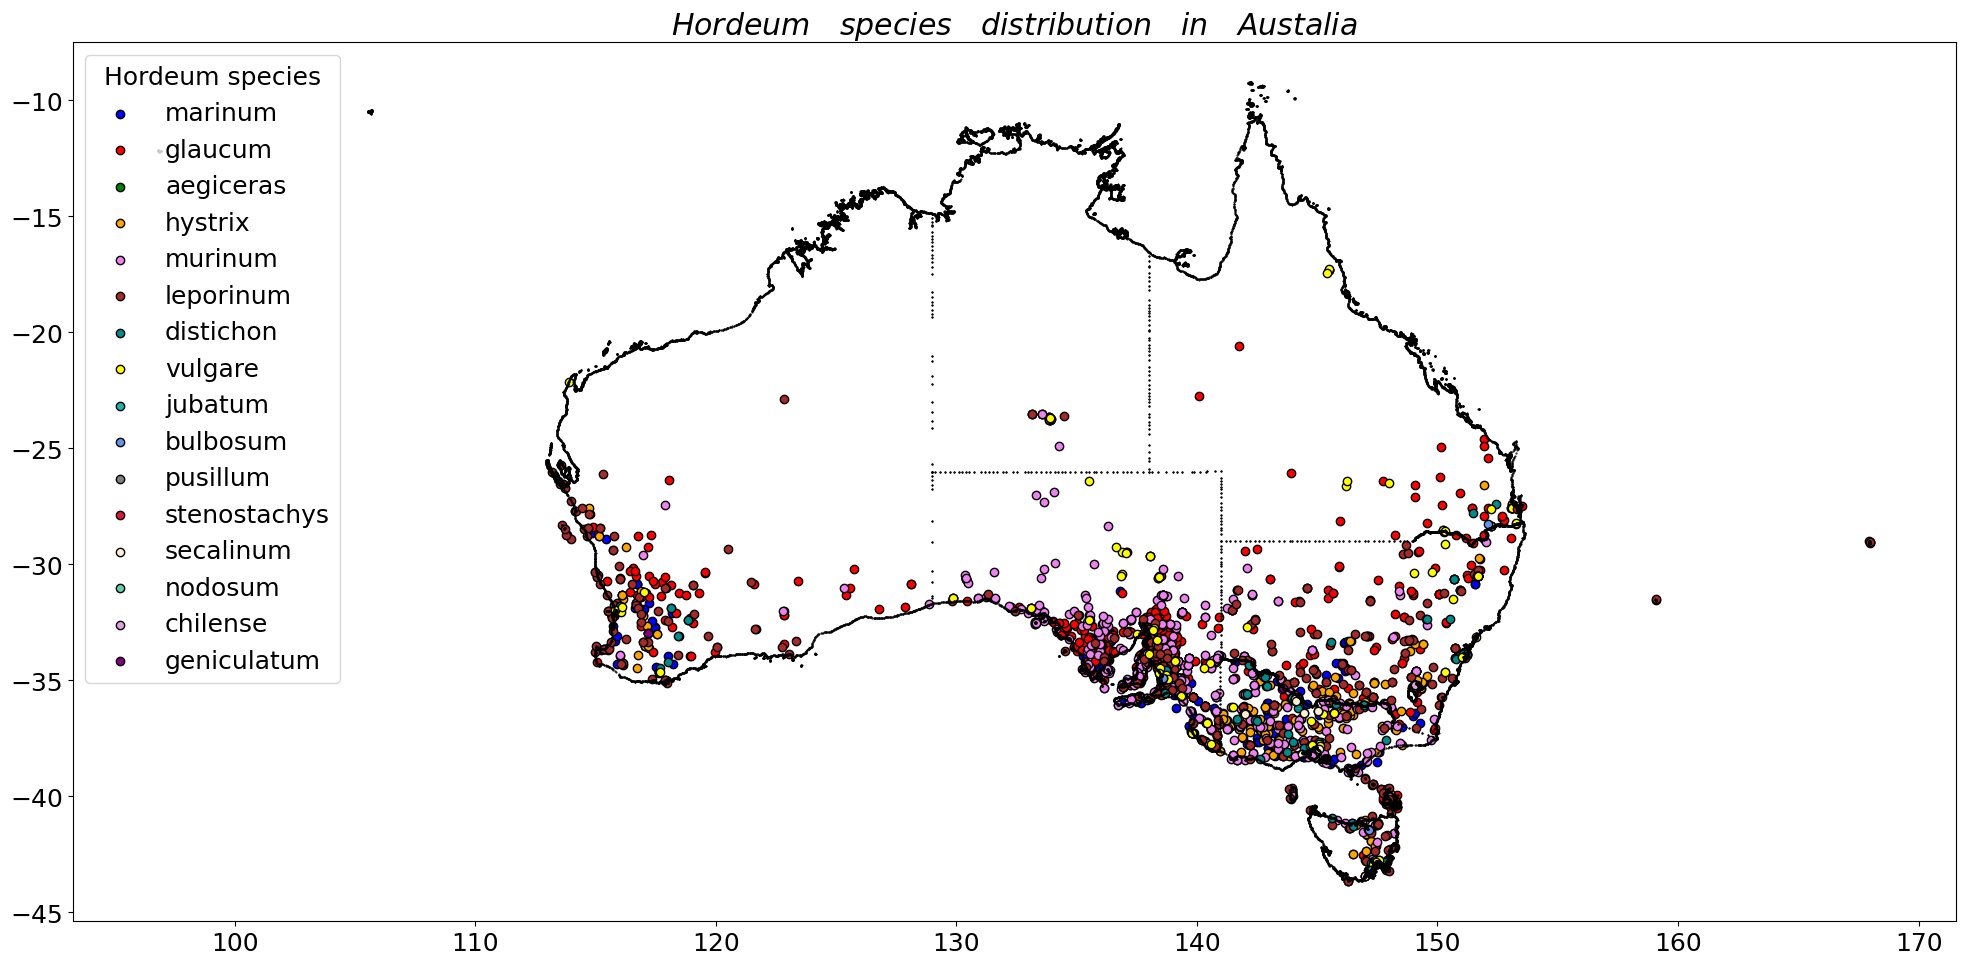

In [285]:
# DONE :)
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
# draw the country, state and territory borders 
for state_or_territory in ausgeo:
    for coordinate_group in state_or_territory.get("geo_shape").get("geometry").get("coordinates"):
        for coordinate in coordinate_group:
            try:
                for (x, y) in coordinate:
                    axes.plot(x, y, marker='o', color="black", markersize=0.5)
            except TypeError:
                axes.plot(coordinate[0], coordinate[1], marker='o', color="black", markersize=0.5)
# plot the species                 
for species in hordeum_tidied.specificEpithet.unique():
    axes.scatter(x=hordeum_tidied.query(f"specificEpithet==\"{species}\"").decimalLongitude,
                 y=hordeum_tidied.query(f"specificEpithet==\"{species}\"").decimalLatitude,
                 color=hordeum_colour_lookup.get(species), label=species, edgecolor="black")#, alpha=0.5)
axes.legend(loc="upper left", title="Hordeum species")
axes.set_title(r"$Hordeum\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}Austalia$")
plt.tight_layout()
plt.savefig(fname="./hordeum-australia.jpeg", dpi=350)
# plt.show()

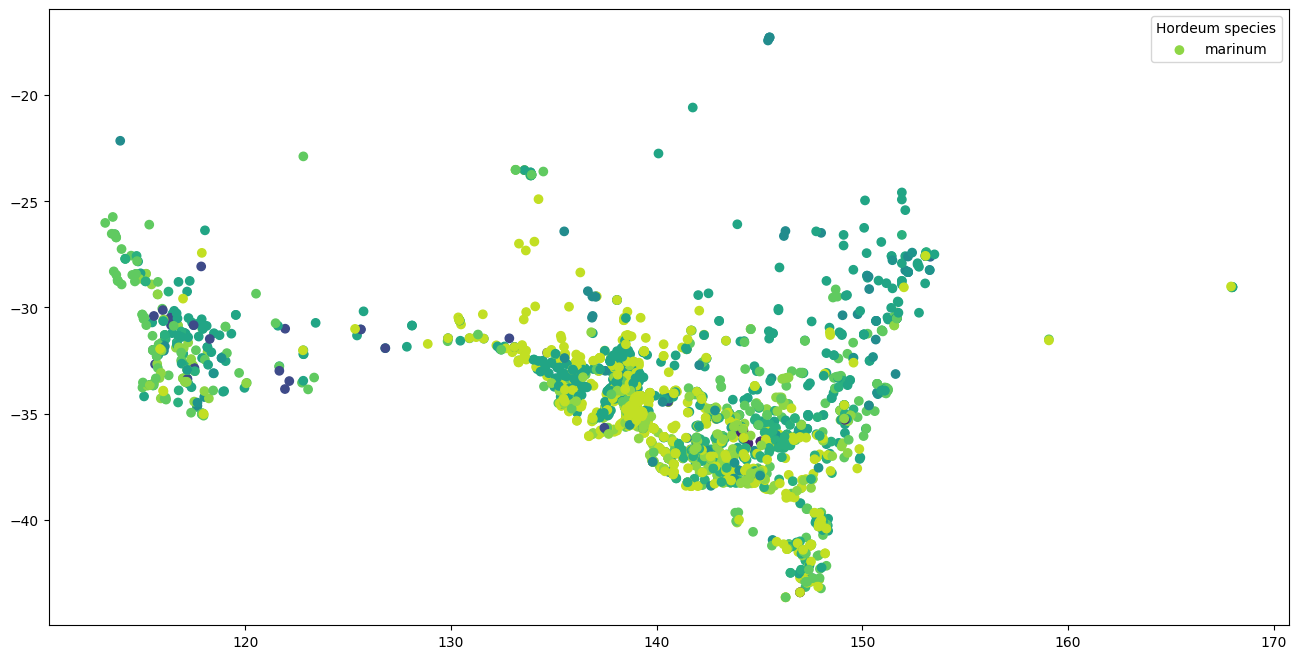

In [214]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
scatter = axes.scatter(hordeum_tidied.decimalLongitude, hordeum_tidied.decimalLatitude,
             c=np.square(hordeum_tidied.specificEpithet.astype("category").cat.codes.values),
                      label=hordeum_tidied.specificEpithet)
axes.legend(labels=hordeum_tidied.specificEpithet.unique(), loc="upper right", title="Hordeum species")
plt.show()

In [274]:
hordeum_tidied_nsw =  hordeum_australia.loc[:, ["country", "stateProvince", "day", "month", "year",
                         "genus", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                                query("decimalLatitude<-10 & specificEpithet!=\"sp.\" & stateProvince==\"New South Wales\"")

In [275]:
hordeum_tidied_nsw

,country,stateProvince,day,month,year,genus,specificEpithet,decimalLatitude,decimalLongitude
140,Australia,New South Wales,1.0,10.0,1934.0,Hordeum,leporinum,-33.781667,151.167778
141,Australia,New South Wales,15.0,11.0,1991.0,Hordeum,leporinum,-33.828767,151.064067
142,Australia,New South Wales,21.0,2.0,1947.0,Hordeum,leporinum,-35.715000,147.301111
143,Australia,New South Wales,16.0,11.0,1952.0,Hordeum,leporinum,-35.165000,146.084444
144,Australia,New South Wales,3.0,10.0,2004.0,Hordeum,leporinum,-33.916667,151.233333
...,...,...,...,...,...,...,...,...,...
2540,Australia,New South Wales,NaN,NaN,1870.0,Hordeum,murinum,-32.600000,149.566700
2594,Australia,New South Wales,NaN,10.0,1930.0,Hordeum,hystrix,-35.216700,146.716700
2603,Australia,New South Wales,NaN,NaN,NaN,Hordeum,murinum,-29.050000,152.016700
2644,Australia,New South Wales,10.0,10.0,1949.0,Hordeum,hystrix,-35.833300,145.633300


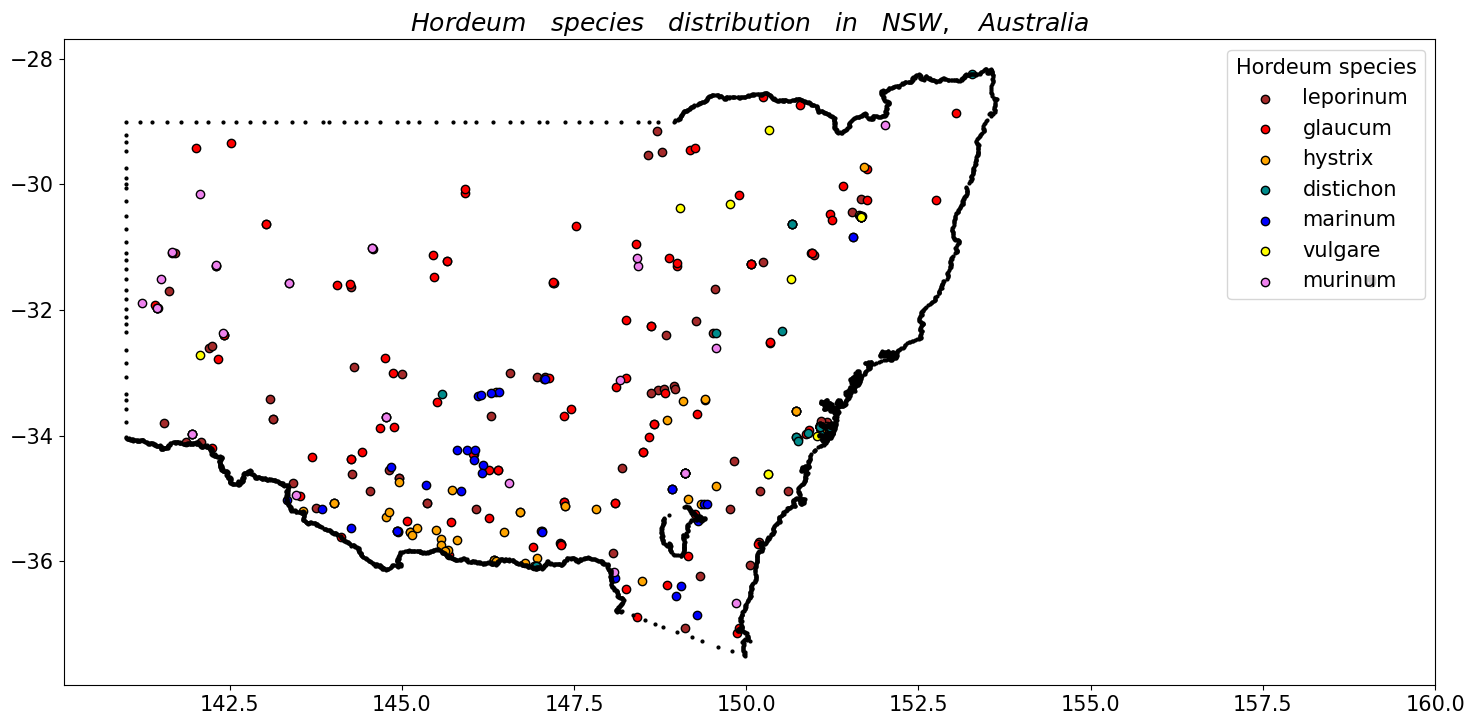

In [283]:
# JUST FOR NSW

fig, axes = plt.subplots()
fig.set_size_inches(15, 7.5)
plt.rcParams["font.size"] = 15
axes.set_title(r"$Hordeum\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}NSW,\hspace{1}Australia$")

for coordinate_group in ausgeo[4].get("geo_shape").get("geometry").get("coordinates"):
    for coordinate in coordinate_group:
        try:
            for (x, y) in coordinate:
                axes.plot(x, y, marker='o', color="black", markersize=2)
        except TypeError:
            axes.plot(coordinate[0], coordinate[1], marker='o', color="black", markersize=2)
            
# plot the species                 
for species in hordeum_tidied_nsw.specificEpithet.unique():
    axes.scatter(x=hordeum_tidied_nsw.query(f"specificEpithet==\"{species}\"").decimalLongitude,
                 y=hordeum_tidied_nsw.query(f"specificEpithet==\"{species}\"").decimalLatitude,
                 color=hordeum_colour_lookup.get(species), label=species, edgecolor="black")#, alpha=0.5)
axes.legend(loc="upper right", title="Hordeum species")

plt.tight_layout()
plt.savefig(fname="./hordeum-nsw.jpeg", dpi=350)
# plt.show()